**About the Model**

In this kernel, using [ML-Ensemble](http://ml-ensemble.com/), I developed a Super Learner model with Python to predict the customer revenue through the Google Analytics dataset.
This Super Learner model, consists on LinearRegression as a meta-model and LightGBM, XGBRegressor, and CatBoostRegressor as base-models.
Also, thanks to the pandas new updates (Version 1.0.0) specially in resolving issues with “named aggregation”, I was able to make a transparent and well organized codes for this project.

**Solution Structure**

Based on the train and test files and dates, we are going to predict returning customers behavior after a given time interval. Let's get started with calculating time interval.
Based on the project specs:
1. train_v2.csv file contains user transactions from August 1st, 2016 to April 30th, 2018 (637 days).
2. test_v2.csv file contains user transactions from May 1st, 2018 to October 15th, 2018 (167 days).
3. Final goal is to predict revenue for each of the visitors for the timeframe of December 1st, 2018 to January 31st, 2019 (61 days).
4. The gap between #2 and #3 is 47 days.

Based on the #2, #3, and #4, in this project we are going to predict revenue of returning visitores of 61 days interval (A) which visited the site in previous 167 days interval (B) and gap between the A and B is 47 days.
We can split our train data out based on this pattern and train our model to get ready for final predictions.


**References**
* ML_Ensemble documents, Link: http://ml-ensemble.com/
* [How to Develop Super Learner Ensembles in Python](https://machinelearningmastery.com/super-learner-ensemble-in-python/), by [Jason Brownlee](https://machinelearningmastery.com/author/jasonb/) on December 11, 2019 in Python Machine Learning.
* Data generation script: [https://www.kaggle.com/qnkhuat/make-data-ready](https://www.kaggle.com/qnkhuat/make-data-ready)
* Stacking part is from this script: https://www.kaggle.com/ashishpatel26/updated-bayesian-lgbm-xgb-cat-fe-kfold-cv
* Reference scripts for selecting important features, dataset splitting patterns, and others: https://www.kaggle.com/kostoglot/winning-solution, https://www.kaggle.com/augustmarvel/base-model-v2-user-level-solution







     |████████████████████████████████| 10.1MB 2.8MB/s 
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
1.0.1


[MLENS] backend: threading
/opt/conda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.0.1
/kaggle/input/ga-customer-revenue-prediction/sample_submission_v2.csv
/kaggle/input/ga-customer-revenue-prediction/train_v2.csv
/kaggle/input/ga-customer-revenue-prediction/test_v2.csv
/kaggle/input/ga-customer-revenue-prediction/sample_submission.csv
/kaggle/input/ga-customer-revenue-prediction/test.csv
/kaggle/input/ga-customer-revenue-prediction/train.csv
0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:137: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:146: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:137: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:146: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


2
3
4
5
6
7
8
0
1
2


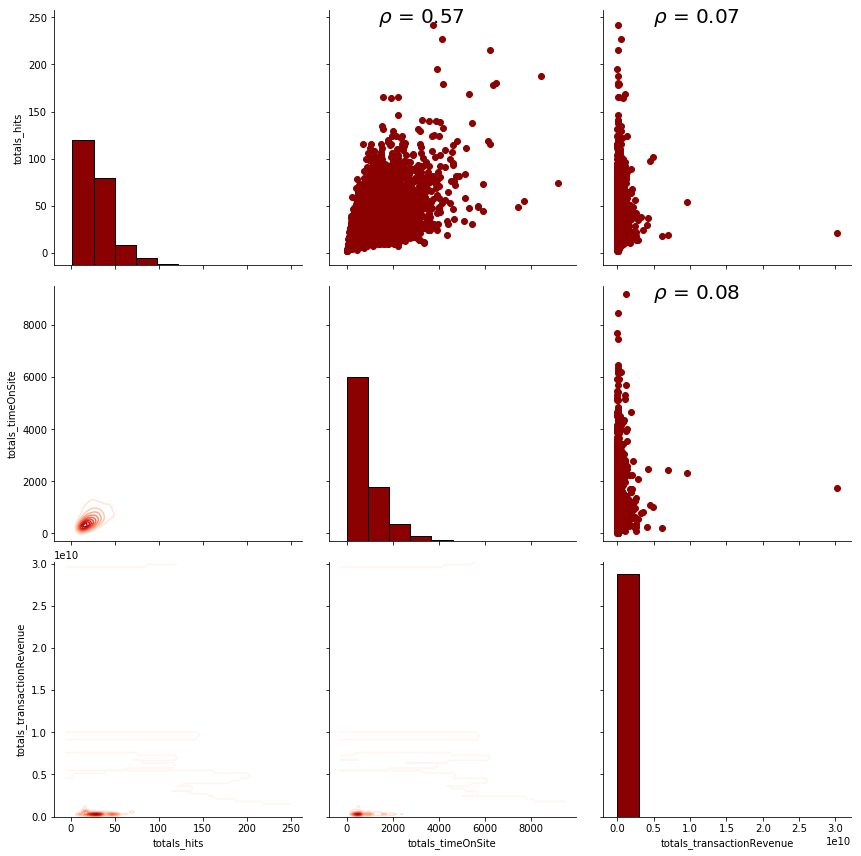

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:303: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

***Set 1
Train (637361, 38) (637361,) Test (424908, 38) (424908,)
________________________________________________________________________________
                                 ft-m  ft-s  pt-m  pt-s
layer-1  lgbmclassifier         71.59  1.64  7.08  0.56
layer-1  logisticregression      4.17  0.12  1.85  0.05
layer-1  xgbclassifier         104.40  0.24  5.61  0.23

Train (3754, 38) (3754,) Test (2504, 38) (2504,)
________________________________________________________________________________
0:	learn: 4.0257276	total: 58.5ms	remaining: 58.5s
0:	learn: 4.1280695	total: 44.2ms	remaining: 44.2s
0:	learn: 4.0808034	total: 74.3ms	remaining: 1m 14s
0:	learn: 4.1592335	total: 13.5ms	remaining: 13.5s
50:	learn: 3.7084041	total: 602ms	remaining: 11.2s
50:	learn: 3.8464513	total: 530ms	remaining: 9.88s
50:	learn: 3.7756394	total: 672ms	remaining: 12.5s
50:	learn: 3.7643736	total: 715ms	remaining: 13.3s
100:	learn: 3.7597080	total: 1.06s	remaining: 9.43s
100:	learn: 3.6856754	total: 1.19s	re

In [1]:
# Install the latest version of the pandas
!pip install pandas --upgrade
import importlib
importlib.invalidate_caches()
import pandas as pd
print(pd.__version__)

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
from numpy import savetxt,inf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from pandas.io.json import json_normalize
import time
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import datetime
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mlens.ensemble import SuperLearner
import lightgbm as lgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import os as os
from os.path import join as pjoin
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline
print(pd.__version__)
p = sns.color_palette()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### LOAD & PREPARE FILES
  # Loading train_v2.csv and test_v2.csv files to the Pandas dataframe
  # Flattening the JSON fields in the input files
  # Casting the data types for fields
  # Dealing with the missing values based on the columns data types
  # Preprocessing the categorical fields. We will use the regression models and need to convert catecorical fields to numerical fields.
###   

# Dealing with the missing values based on the columns data types
# We're using make-data-ready script at this link: https://www.kaggle.com/qnkhuat/make-data-ready
def to_na(df):
    # Each type of columns that need to replace with the right na values
    to_NA_cols = ['trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType',
                'trafficSource_adwordsClickInfo.slot','trafficSource_adwordsClickInfo.gclId',
                'trafficSource_keyword','trafficSource_referralPath','customDimensions_value']

    to_0_cols = ['totals_transactionRevenue','trafficSource_adwordsClickInfo.page','totals_sessionQualityDim','totals_bounces',
                 'totals_timeOnSite','totals_newVisits','totals_pageviews','customDimensions_index','totals_transactions','totals_totalTransactionRevenue']

    to_true_cols = ['trafficSource_adwordsClickInfo.isVideoAd']
    to_false_cols = ['trafficSource_isTrueDirect']
    
    df[to_NA_cols] = df[to_NA_cols].fillna('NaN')
    df[to_0_cols] = df[to_0_cols].fillna(0)
    df[to_true_cols] = df[to_true_cols].fillna(True)
    df[to_false_cols] = df[to_false_cols].fillna(False)
    
    return df
    
def encode_date(df):
    fld = pd.to_datetime(df['date'], infer_datetime_format=True)
    
    attrs = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
        'Is_month_end', 'Is_month_start', 'Is_quarter_end', 
        'Is_quarter_start', 'Is_year_end', 'Is_year_start','Hour']
        
    for attr in attrs:
        df['Date_'+attr] = getattr(fld.dt,attr.lower())
        
    return df

def weird_na(df):
    cols_to_replace = {
        'socialEngagementType' : 'Not Socially Engaged',
        'device_browserSize' : 'not available in demo dataset', 
        'device_flashVersion' : 'not available in demo dataset', 
        'device_browserVersion' : 'not available in demo dataset', 
        'device_language' : 'not available in demo dataset',
        'device_mobileDeviceBranding' : 'not available in demo dataset',
        'device_mobileDeviceInfo' : 'not available in demo dataset',
        'device_mobileDeviceMarketingName' : 'not available in demo dataset',
        'device_mobileDeviceModel' : 'not available in demo dataset',
        'device_mobileInputSelector' : 'not available in demo dataset',
        'device_operatingSystemVersion' : 'not available in demo dataset',
        'device_screenColors' : 'not available in demo dataset',
        'device_screenResolution' : 'not available in demo dataset',
        'geoNetwork_city' : 'not available in demo dataset',
        'geoNetwork_cityId' : 'not available in demo dataset',
        'geoNetwork_latitude' : 'not available in demo dataset',
        'geoNetwork_longitude' : 'not available in demo dataset',
        'geoNetwork_metro' : ['not available in demo dataset', '(not set)'], 
        'geoNetwork_networkDomain' : ['unknown.unknown', '(not set)'], 
        'geoNetwork_networkLocation' : 'not available in demo dataset',
        'geoNetwork_region' : 'not available in demo dataset',
        'trafficSource_adwordsClickInfo.criteriaParameters' : 'not available in demo dataset',
        'trafficSource_campaign' : '(not set)', 
        'trafficSource_keyword' : '(not provided)',
        'trafficSource_medium' : '(none)',
        'networkDomain': '(not set)', 
        'city': '(not set)', 
    }
    df = df.replace(cols_to_replace,'NaN')
    return df

def del_const(df):
    const_col = []
    for col in df.columns:
        if df[col].nunique() == 1 and df[col].isnull().sum()==0 :
            const_col.append(col)
            
    df.drop(const_col,axis=1,inplace=True)
    return df, const_col
    
def json_it(df):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column]) 
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns] 
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
            
     # Normalize customDimensions
    df['customDimensions']=df['customDimensions'].apply(literal_eval)
    df['customDimensions']=df['customDimensions'].str[0]
    df['customDimensions']=df['customDimensions'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)

    column_as_df = json_normalize(df['customDimensions'])
    column_as_df.columns = [f"customDimensions_{subcolumn}" for subcolumn in column_as_df.columns]
    df = df.drop('customDimensions', axis=1).merge(column_as_df, right_index=True, left_index=True)
    
    return df

def convert_it(df):
    # Convert weird string to na
    df = weird_na(df)
    
    # Convert columns to Na on it own type
    df = to_na(df)
    
    # Create new columsn with data
    df_train = encode_date(df)
    
    return df
    
def fix_type(df):
    try:
        df.drop('trafficSource_campaignCode',axis=1,inplace=True)
    except:
        pass
    # Fill na and rename the Revenue column
    df['totals_transactionRevenue'] = df['totals_transactionRevenue'].fillna(0).astype(float)

    to_int = ['totals_bounces','totals_newVisits','totals_pageviews',
            'customDimensions_index','totals_hits','totals_sessionQualityDim',
            'totals_visits','totals_timeOnSite','trafficSource_adwordsClickInfo.page',
            'totals_transactions','totals_totalTransactionRevenue']
    for col in to_int :
        df[col] = df[col].astype(int)

    return df

# Start Loading & Preprocessing    
def load_it(csv_path,name):
    CONST_COLLUMNS = ['socialEngagementType','device_browserSize',
         'device_browserVersion','device_flashVersion',
         'device_language','device_mobileDeviceBranding',
         'device_mobileDeviceInfo','device_mobileDeviceMarketingName',
         'device_mobileDeviceModel','device_mobileInputSelector',
         'device_operatingSystemVersion','device_screenColors',
         'device_screenResolution','geoNetwork_cityId',
         'geoNetwork_latitude','geoNetwork_longitude',
         'geoNetwork_networkLocation',
         'trafficSource_adwordsClickInfo.criteriaParameters',]
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    dfs = pd.read_csv(csv_path, sep=',',
                    parse_dates=['date'],
                    converters={column: json.loads for column in JSON_COLUMNS}, 
                    dtype={'fullVisitorId': 'str'}, # Important!!
                    chunksize = 200000)
    
    for idx,df in enumerate(dfs):
        print(idx)
        df.reset_index(drop = True,inplace = True)
        df = json_it(df)
        df = convert_it(df)
        df.drop(CONST_COLLUMNS,axis=1,inplace=True)
        # Heavy as hell this column
        df.drop('hits',axis=1,inplace=True)
        df = fix_type(df)
        df.to_pickle(f'{name}_{idx}.pkl')
        
        del df
        gc.collect()

# Read the input files
train_file = "../input/ga-customer-revenue-prediction/train_v2.csv"
test_file = "../input/ga-customer-revenue-prediction/test_v2.csv"
df_train_raw = load_it(train_file,'train')
df_test_raw = load_it(test_file,'test')

# Main function to make a final train and test data frames
def load_data(data='train',n=2):
    df = pd.DataFrame()
    for i in range(n) :
        if data=='train':
            if i > 8 :
                break
            dfpart = pd.read_pickle(pjoin('../working',f'train_{i}.pkl'))
        elif data=='test':
            if i > 2 :
                break
            dfpart = pd.read_pickle(pjoin('../working',f'test_{i}.pkl'))
        df = pd.concat([df,dfpart])
        del dfpart    
    return df

df_train = load_data(n=9)
df_test = load_data('test',n=4) 
df = pd.concat([df_train,df_test])

# Picking up a target dataset
test_date = datetime.datetime(2018, 5, 1)
df_test_set = df[df['date'] >=  test_date]

### DATA VISUALIZATION
  # Function to calculate correlation coefficient between two features in 2018
###
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
endyear_date = datetime.datetime(2018, 1, 1)
grid = sns.PairGrid(data= df[(df['date'] >= endyear_date) & (df['totals_transactionRevenue'] > 0)],
                    vars = ['totals_hits', 'totals_timeOnSite', 'totals_transactionRevenue'], height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred')
plt.show()

### SPLIT The DATASET UP
# The training set duration is 167 days 
# 45 days gab between training and test set
# The test set statrts from 167 + 47 and last for 61 days
train_range = pd.date_range(start='2016-08-01',end='2018-10-15', freq='275D')
train_end = train_range.to_series().shift(periods=167, freq='d',axis= 0)
test_strart = train_range.to_series().shift(periods=214, freq='d',axis= 0)
train_range = train_range.to_series()

# Generate dataset
important_cols = ['channelGrouping','date','fullVisitorId','visitId','visitNumber','visitStartTime','device_browser','device_deviceCategory',
                  'device_operatingSystem', 'device_isMobile','geoNetwork_continent', 'geoNetwork_subContinent','geoNetwork_country','geoNetwork_region','geoNetwork_metro','geoNetwork_city','geoNetwork_networkDomain','totals_bounces',
                  'totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_totalTransactionRevenue','totals_transactionRevenue',
                  'totals_transactions','trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType', 'trafficSource_adwordsClickInfo.gclId','trafficSource_adwordsClickInfo.isVideoAd',
                  'trafficSource_adwordsClickInfo.page', 'trafficSource_adwordsClickInfo.slot','trafficSource_campaign','trafficSource_isTrueDirect','trafficSource_keyword','trafficSource_medium','trafficSource_referralPath','trafficSource_source']

df = df[important_cols]
def proc_data(df, i = 0):    
    train_set = df[(df.date>=train_range.index[i]) & (df.date <=train_end.index[i])]
    if i == 2:
        test_set_ids = df[(df.date >= test_strart.index[i])].fullVisitorId.unique()
    else:
        test_set_ids = df[(df.date >= test_strart.index[i]) & (df.date < train_range.index[i + 1])].fullVisitorId.unique()
    test_set_ids = pd.Series(test_set_ids)
    train_returned =  pd.merge(train_set, test_set_ids.rename('fullVisitorId'), how='inner', on=['fullVisitorId'])
    returned_set_ids = train_returned.fullVisitorId.unique()
    returned_set_ids = pd.Series(returned_set_ids)
    if i==2:
        test_set = df[(df.date >= test_strart.index[i])]
    else:
        test_set = df[(df.date >= test_strart.index[i]) & (df.date < train_range.index[i + 1])]
    test_returned = pd.merge(test_set, returned_set_ids.rename('fullVisitorId'), how='inner', on=['fullVisitorId'])
    test_returned = test_returned.groupby("fullVisitorId")['totals_transactionRevenue'].apply(lambda x: np.log(sum(x))).reset_index()
    test_returned['target'] = test_returned['totals_transactionRevenue'].apply(lambda x: 0 if x == -inf else x)
    test_returned = test_returned.drop(['totals_transactionRevenue'],axis = 1)
    test_returned['retuningVisitor'] = 1
    test_tmp_nonret = pd.merge(train_set, returned_set_ids.rename('fullVisitorId'), how='left', on=['fullVisitorId'], indicator=True).query('_merge=="left_only"')
    test_tmp_ids = test_tmp_nonret.fullVisitorId.unique()
    test_nonret = pd.DataFrame(data =test_tmp_ids, columns= ['fullVisitorId'])
    test_nonret['target'] = 0
    test_nonret['retuningVisitor'] = 0
    test_target = pd.concat((test_returned,test_nonret), axis = 0)
    test_target.fillna(0, inplace=True)

  # Encoding numerical columns
    numerical_ix = df[df.columns[df.columns != 'totals_transactionRevenue']].select_dtypes(include=['int64', 'float64']).columns

    # Iterate and encode mumerical columns
    for idx,column in enumerate(numerical_ix):    
            le = MinMaxScaler()
            train_set[column] = le.fit_transform(train_set[column].values.reshape(-1, 1))            

    # Determine categorical features
    categorical_ix = df[['channelGrouping','device_browser','device_deviceCategory','device_isMobile','device_operatingSystem','geoNetwork_continent','geoNetwork_subContinent', 'geoNetwork_country','geoNetwork_region',
                        'geoNetwork_metro','geoNetwork_city','geoNetwork_networkDomain','trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType','trafficSource_adwordsClickInfo.gclId','trafficSource_adwordsClickInfo.slot',
                        'trafficSource_campaign','trafficSource_adwordsClickInfo.isVideoAd','trafficSource_isTrueDirect','trafficSource_keyword','trafficSource_medium','trafficSource_referralPath','trafficSource_source', 'date']]

    # Label encoding categorical features
    for idx,column in enumerate(categorical_ix):    
            le = LabelEncoder()
            train_set[column] = le.fit_transform(train_set[column].values.reshape(-1, 1))
      
    # Make a final data frame
    train_set = train_set.groupby('fullVisitorId').agg(
        channelGrouping = pd.NamedAgg(column = 'channelGrouping', aggfunc = max),
        first_visit = pd.NamedAgg(column = 'date', aggfunc = min),
        last_visit = pd.NamedAgg(column = 'date', aggfunc = max),
        visit_interval = pd.NamedAgg(column = "date", aggfunc = lambda x: (max(x) - min(x))),
        unique_dates = pd.NamedAgg(column = "date", aggfunc = lambda x: len(x.unique())),
        max_visits = pd.NamedAgg(column = 'visitNumber', aggfunc = max),
        visits_average = pd.NamedAgg(column ="visitStartTime", aggfunc= lambda x: (max(x) - min(x))),
        browser = pd.NamedAgg(column = 'device_browser', aggfunc = max),
        device_category = pd.NamedAgg(column = 'device_deviceCategory', aggfunc = max),
        device_operatingSystem = pd.NamedAgg(column = 'device_operatingSystem', aggfunc = max),
        device_isMobile = pd.NamedAgg(column = 'device_isMobile', aggfunc = max),
        geoNetwork_continent = pd.NamedAgg(column = 'geoNetwork_continent', aggfunc = max),
        geoNetwork_subContinent = pd.NamedAgg(column = 'geoNetwork_subContinent', aggfunc = max),    
        geoNetwork_country = pd.NamedAgg(column = 'geoNetwork_country', aggfunc = max),
        geoNetwork_region = pd.NamedAgg(column = 'geoNetwork_region', aggfunc = max),
        geoNetwork_metro = pd.NamedAgg(column = 'geoNetwork_metro', aggfunc = max),
        geoNetwork_city = pd.NamedAgg(column = 'geoNetwork_city', aggfunc = max),
        geoNetwork_networkDomain = pd.NamedAgg(column = 'geoNetwork_networkDomain', aggfunc = max),
        totals_bounces = pd.NamedAgg(column = 'totals_bounces', aggfunc = sum),
        totals_hits_sum = pd.NamedAgg(column = 'totals_hits', aggfunc = sum),
        totals_hits_mean = pd.NamedAgg(column = 'totals_hits', aggfunc = np.mean),
        totals_hits_min = pd.NamedAgg(column = 'totals_hits', aggfunc = min),
        totals_hits_max = pd.NamedAgg(column = 'totals_hits', aggfunc = max),
        totals_hits_meidan = pd.NamedAgg(column = 'totals_hits', aggfunc = np.median),
        totals_hits_std = pd.NamedAgg(column = 'totals_hits', aggfunc = np.std),
        totals_pageviews_sum = pd.NamedAgg(column = 'totals_pageviews', aggfunc = sum),
        totals_pageviews_mean = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.mean),
        totals_pageviews_min = pd.NamedAgg(column = 'totals_pageviews', aggfunc = min),
        totals_pageviews_max = pd.NamedAgg(column = 'totals_pageviews', aggfunc = max),
        totals_pageviews_median = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.median),
        totals_pageviews_std = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.std),
        totals_sessionQualityDim_mean = pd.NamedAgg(column = 'totals_sessionQualityDim', aggfunc = np.mean),
        totals_timeOnSite_sum = pd.NamedAgg(column = 'totals_timeOnSite', aggfunc = sum),
        totals_totalTransactionRevenue_sum = pd.NamedAgg(column = 'totals_totalTransactionRevenue', aggfunc = sum),
        totals_transactions_sum = pd.NamedAgg(column = 'totals_transactions', aggfunc = sum),
        totals_transactionRevenue = pd.NamedAgg(column = 'totals_transactionRevenue', aggfunc = sum)
    ).reset_index()
    df_FT = (train_set.join(test_target.set_index('fullVisitorId'), on='fullVisitorId', how= 'inner'))
    return df_FT

# Preprocessing test dataset
df_test_set = df_test_set[important_cols]

# Encoding numerical columns
numerical_ix = df_test_set[df_test_set.columns[df_test_set.columns != 'totals_transactionRevenue']].select_dtypes(include=['int64', 'float64']).columns

# Iterate and encode mumerical columns
for idx,column in enumerate(numerical_ix):    
        le = MinMaxScaler()
        df_test_set[column] = le.fit_transform(df_test_set[column].values.reshape(-1, 1))

# Determine categorical features
categorical_ix = df_test_set[['channelGrouping','device_browser','device_deviceCategory','device_isMobile','device_operatingSystem','geoNetwork_continent','geoNetwork_subContinent', 'geoNetwork_country','geoNetwork_region',
                    'geoNetwork_metro','geoNetwork_city','geoNetwork_networkDomain','trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType','trafficSource_adwordsClickInfo.gclId','trafficSource_adwordsClickInfo.slot',
                    'trafficSource_campaign','trafficSource_adwordsClickInfo.isVideoAd','trafficSource_isTrueDirect','trafficSource_keyword','trafficSource_medium','trafficSource_referralPath','trafficSource_source', 'date']]

# Label encoding categorical features
for idx,column in enumerate(categorical_ix):    
        le = LabelEncoder()
        df_test_set[column] = le.fit_transform(df_test_set[column].values.reshape(-1, 1))

# Make a final dataframe
df_test_FN = df_test_set.groupby('fullVisitorId').agg(
        channelGrouping = pd.NamedAgg(column = 'channelGrouping', aggfunc = max),
        first_visit = pd.NamedAgg(column = 'date', aggfunc = min),
        last_visit = pd.NamedAgg(column = 'date', aggfunc = max),
        visit_interval = pd.NamedAgg(column = "date", aggfunc = lambda x: (max(x) - min(x))),
        unique_dates = pd.NamedAgg(column = "date", aggfunc = lambda x: len(x.unique())),
        max_visits = pd.NamedAgg(column = 'visitNumber', aggfunc = max),
        visits_average = pd.NamedAgg(column ="visitStartTime", aggfunc= lambda x: (max(x) - min(x))),
        browser = pd.NamedAgg(column = 'device_browser', aggfunc = max),
        device_category = pd.NamedAgg(column = 'device_deviceCategory', aggfunc = max),
        device_operatingSystem = pd.NamedAgg(column = 'device_operatingSystem', aggfunc = max),
        device_isMobile = pd.NamedAgg(column = 'device_isMobile', aggfunc = max),
        geoNetwork_continent = pd.NamedAgg(column = 'geoNetwork_continent', aggfunc = max),
        geoNetwork_subContinent = pd.NamedAgg(column = 'geoNetwork_subContinent', aggfunc = max),    
        geoNetwork_country = pd.NamedAgg(column = 'geoNetwork_country', aggfunc = max),
        geoNetwork_region = pd.NamedAgg(column = 'geoNetwork_region', aggfunc = max),
        geoNetwork_metro = pd.NamedAgg(column = 'geoNetwork_metro', aggfunc = max),
        geoNetwork_city = pd.NamedAgg(column = 'geoNetwork_city', aggfunc = max),
        geoNetwork_networkDomain = pd.NamedAgg(column = 'geoNetwork_networkDomain', aggfunc = max),
        totals_bounces = pd.NamedAgg(column = 'totals_bounces', aggfunc = sum),
        totals_hits_sum = pd.NamedAgg(column = 'totals_hits', aggfunc = sum),
        totals_hits_mean = pd.NamedAgg(column = 'totals_hits', aggfunc = np.mean),
        totals_hits_min = pd.NamedAgg(column = 'totals_hits', aggfunc = min),
        totals_hits_max = pd.NamedAgg(column = 'totals_hits', aggfunc = max),
        totals_hits_meidan = pd.NamedAgg(column = 'totals_hits', aggfunc = np.median),
        totals_hits_std = pd.NamedAgg(column = 'totals_hits', aggfunc = np.std),
        totals_pageviews_sum = pd.NamedAgg(column = 'totals_pageviews', aggfunc = sum),
        totals_pageviews_mean = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.mean),
        totals_pageviews_min = pd.NamedAgg(column = 'totals_pageviews', aggfunc = min),
        totals_pageviews_max = pd.NamedAgg(column = 'totals_pageviews', aggfunc = max),
        totals_pageviews_median = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.median),
        totals_pageviews_std = pd.NamedAgg(column = 'totals_pageviews', aggfunc = np.std),
        totals_sessionQualityDim_mean = pd.NamedAgg(column = 'totals_sessionQualityDim', aggfunc = np.mean),
        totals_timeOnSite_sum = pd.NamedAgg(column = 'totals_timeOnSite', aggfunc = sum),
        totals_totalTransactionRevenue_sum = pd.NamedAgg(column = 'totals_totalTransactionRevenue', aggfunc = sum),
        totals_transactions_sum = pd.NamedAgg(column = 'totals_transactions', aggfunc = sum),
        totals_transactionRevenue = pd.NamedAgg(column = 'totals_transactionRevenue', aggfunc = sum)
    ).reset_index() 

df_train_0 = proc_data(df, 0)
df_train_1 = proc_data(df, 1)
df_train_2 = proc_data(df, 2)
train_set = pd.concat((df_train_0,df_train_1,df_train_2,df_test_FN), axis=0)
train = train_set.loc[~pd.isnull(train_set.retuningVisitor)]
test = train_set.loc[pd.isnull(train_set.retuningVisitor)]
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
train_ret = train[train['retuningVisitor'] == 1]

# Free memory
del df_train_0,df_train_1,df_train_2,train_set
gc.collect()

# Super learner for regression using the mlens library
# This Super Learner algorithm, consists on LinearRegression as a meta-model and LightGBM, XGBRegressor, and CatBoostRegressor as base-models 
regression_params={'learning_rate': 0.01,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 32,
        'verbose': 1,
        'bagging_fraction': 0.9,
        'feature_fraction': 0.9,
        "random_state":42,
        'max_depth': 5,        
        "verbosity" : -1,
        "bagging_frequency" : 5,
        'lambda_l2': 0.5,
        'lambda_l1': 0.5,
        'min_child_samples': 36        
       }
xgb_regression_params = {
        'objective': 'reg:squarederror',
        'booster': 'gbtree',
        'learning_rate': 0.02,      
        'gamma' : 1.45,
        'alpha': 0.0,
        'lambda': 0.0,
        'subsample': 0.67,
        'colsample_bytree': 0.054,
        'colsample_bylevel': 0.50,
        'n_jobs': -1,        
        'importance_type': 'total_gain'
    }

cat_regression_param = {
    'learning_rate' :0.03,
    'eval_metric' :'RMSE',
    'od_type' :'Iter',
    'metric_period' : 50,
    'od_wait' : 20,        
    'bagging_temperature' : 0.2
    
}

# Super learner for binary classification using the mlens library
# This Super Learner algorithm, consists on LogisticRegression as a meta-model and LightGBM, XGBRegressor, and CatBoostclassifier as base-models.
 
classification_params={'learning_rate': 0.01,
        'objective':'binary',
        'metric':'binary_logloss',
        'num_leaves': 32,
        'verbose': 1,
        'bagging_fraction': 0.9,
        'feature_fraction': 0.8,
        "random_state":42,
        'max_depth': 5,        
        "verbosity" : -1,
        "bagging_frequency" : 5,
        'lambda_l2': 0.5,
        'lambda_l1': 0.5,
        'min_child_samples': 36        
       }
xgb_classification_params = {
        'objective': 'binary:hinge',
        'booster': 'gbtree',
        'learning_rate': 0.02,      
        'gamma' : 1.45,
        'alpha': 0.0,
        'lambda': 0.0,
        'subsample': 0.67,
        'colsample_bytree': 0.054,
        'colsample_bylevel': 0.50,
        'n_jobs': -1,        
        'importance_type': 'total_gain'
    }

# Create a list of base-models
def get_models(i,j):
    if j == 0:
            reg = lgb.LGBMClassifier(**classification_params, n_estimators = 368 + i, bagging_seed = 42 + i,feature_fraction_seed = 13 + i)
            xgb = XGBClassifier(**xgb_classification_params, n_estimators = 350 + i, random_state = 446 + i, max_depth = 12 + i, min_child_weight = 47 + i )
            meta_model = LogisticRegression(solver='liblinear')
    else:
        reg = lgb.LGBMRegressor(**regression_params, n_estimators = 1100 + i, bagging_seed = 13 + i,feature_fraction_seed = 42 + i)
        xgb = XGBRegressor(**xgb_regression_params, n_estimators = 1000 + i, random_state = 446 + i, max_depth = 12 + i, min_child_weight = 47 + i )
        cat = CatBoostRegressor(**cat_regression_param, iterations = 1000 + i, random_seed = 32 + i, depth = 2 + i)
        meta_model = LinearRegression()
          
    models = list()
    models.append(meta_model)
    models.append(reg)
    models.append(xgb)
    if j == 1:
        models.append(cat)       
    return models
 
# Cost function for base regressor models
def rmse(yreal, yhat):
    return sqrt(mean_squared_error(yreal, yhat))

 
# Create the super learner
def get_super_learner(X,i,j):    
    if j == 0:
        ensemble = SuperLearner(folds=2, shuffle=True, sample_size=len(X))
    else:
        ensemble = SuperLearner(scorer=rmse, folds=10, shuffle=True, sample_size=len(X))
        
    # Add base models
    models = get_models(i,j)    
    ensemble.add(models)
    # Add the meta model
    if j == 0:
        ensemble.add_meta(LogisticRegression(solver='liblinear'))
    else:
        ensemble.add_meta(LinearRegression())    
        
    return ensemble



X_all, y_all = train[train.columns[train.columns != 'retuningVisitor']],train['retuningVisitor']
X_ret, y_ret = train_ret[train_ret.columns[train_ret.columns != 'target']],train_ret['target']
X_test_all = test[test.columns[test.columns != 'retuningVisitor']]
X_test = test[test.columns[test.columns != 'target']]
X_all.fillna(0, inplace=True)
X_ret.fillna(0, inplace=True)
X_test_all.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_all.fillna(0, inplace=True)
y_ret.fillna(0, inplace=True)

def predict(X = 0,y = 0, Xtest = 0, i = 0, j = 0):
    
    # Split data to train, test samples 
    X, X_val, y, y_val = train_test_split(X, y, test_size=0.40)
    print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
    X=X.to_numpy()
    X_val = X_val.to_numpy()
    y=y.to_numpy()
    y_val = y_val.to_numpy()
    Xtest = Xtest.to_numpy()

    # Create the super learner
    ensemble = get_super_learner(X,i,j)

    # Fit the super learner
    print('__' *40)
    ensemble.fit(X, y)

    # Summarize base learners
    print(ensemble.data)
    # Evaluate meta model    
    if j == 0:
        yhat_0 = ensemble.predict_proba(X_val)
        yhat = ensemble.predict_proba(Xtest)
    else:
        yhat_0 = ensemble.predict(X_val)
        print('Super Learner: RMSE %.3f' % (rmse(y_val, yhat_0)))
        yhat = ensemble.predict(Xtest)

    return yhat

yhat_1 = np.zeros(y_all.shape[0])
yhat_2 = np.zeros(y_ret.shape[0])
yhat_all = np.zeros(X_test.shape[0])
yhat_FNL = np.zeros(X_test.shape[0])

for i in range(1, 11):
    print('***Set ' + str(i))
    # Will the customer return back to the store?(Classification)
    # Overall method is same as this notebook: https://www.kaggle.com/kostoglot/winning-solution
    yhat_1 = predict(X_all,y_all,X_test_all,i, j = 0)
    # How much returned customer will spend? (Reggression)
    yhat_2 = predict(X_ret,y_ret,X_test,i, j = 1)
    yhat_all = yhat_all + (yhat_1 * yhat_2)
yhat_FNL = yhat_all/10
yhat_FNL[yhat_FNL < 0] = 0

# Preparing submissin list
test_ID= test.fullVisitorId
# Final predicts
#Final predictions to csv
sub_df = pd.DataFrame(test_ID) 
sub_df["PredictedLogRevenue"] = yhat_FNL
sub_df.to_csv("stacked_result.csv", index=False)